<h1 align="center"> CSE 242 Assignment 4, Fall 2022

<h2 align="center"> 3 Questions, 100 pts, due: 23:59 pm, Nov 11th, 2022
    
    Your name:          Student ID:

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Mathematical Derivation)
- **Task 2:** K-Means implementation (Coding)
- **Task 3:** Kernel Methods with Noisy Setting (Coding)


# Question 1. (EM algorithm, 20 pts)

Derive the E-step and M-step update equations of EM algorithm for estimating the Gaussian mixture model $p(X;\theta) = ∑_{k=1}^{K} \pi_k N(x; \mu_k, \sigma_k^2)$ where $\pi_k$ is the mixture weight with $\pi_k \ge 0$  and  $∑_{k=1}^{K} \pi_k = 1$, and $\mu_k$, $\sigma^2_k$ are the mean and variance of the gaussian distribution corresponding to cluster k. 

For the E-step, first prove that $z_{ik} = \color{blue}{P(z_i = k | X, \mu ,\sigma, \pi)} = \dfrac {\pi_k p(x_i; \mu_k, \sigma_k^2)}{∑_{k=1}^{K} \pi_k p(x_i; \mu_k, \sigma_k^2)}$. Then, for the M-step, show the derivation to compute the updates for $(\mu_k, \pi_k)$. Note that, you don't need to show the derivation for $\sigma_k$. For each derivation step, mention the concept applied (e.g. just 2-3 keywords, e.g. formula for expectation, independence of datapoints, (f+g)' = f' + g', etc ... ). 

**Hint:** For the M-step, you need to solve for $\mu_k^t = \underset{\mu_k}{argmax} \ E(?)\color{blue}{p(z_i = k | X, \mu^{(t-1)}, \sigma^{(t-1)}, \pi^{(t-1)})}{[\log p(X, Z | \mu, \sigma, \pi)]}$ (and similarly for $\pi_k$) by applying the first order conditions for function optimization (take derivative and set it to zero). Note that the term $\color{blue}{p(z_i=k|X,\mu^{(t-1)},\sigma^{(t-1)},\pi^{(t-1)})}$ is the one computed in the E-step, and uses fixed values for $\mu, \sigma, \pi$ from the previous iteration (t-1).







In [ ]:
#See attahed Latex Document for derivaion and steps of EM Algo

# Question 2. (K-Means implementation, 20 pts)

#### **Question 2.1.** Implement K-means in Python from scratch. Complete following sub-functions `update_centroids` and `update_assignments`.



In [242]:
import numpy as np 
import matplotlib.pyplot as plt

#adding a new function just for clarity here:
def get_distance(a,centroids):
  #we will get the closest centroid
  #a -> [x1,y1]
  #b -> [x2,y2]

  all_d = {}

  for i,b in enumerate(centroids):
    #print(i)
    #print(a)
    #print(b)
    distance = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
    all_d[i] = distance

  #print(all_d)
  #lets return the key of the smallest distance in the dictionary
  min_d = min(all_d, key=all_d.get)
  #print(min_d)
  return min_d


def update_assignments(data, centroids):
  #loop and append asigments with either 0,1,2,3 for each of the k=4 clusters
  assigments = np.array([])

  for i in data:
    #print(i)
    #print(assigments)
    assigments = np.append(assigments,get_distance(i,centroids))
    

  return assigments

def update_centroids(data,centroids,assignments):
  new_centroids = centroids
  #print('new_centroid objext is:',type(new_centroids))

  for i,c in enumerate(centroids):
    #print('we are at centroid:',i,new_centroids[i])
    #print('index and centroid point are:',i,c)
    cluster_data = assignments == i
    x = data[cluster_data] #filter only data points assigned to cluster of index i

    #total number of points in cluster of index i
    #print('Array of x cluster:',x)
    #print(len(x))

    #print('Sum of x array i:s',sum(x))

    #we can assign a new centroid with the average of all points in that cluster
    new_c = sum(x)/len(x)
    #print('new center is:',new_c,'of type',type(new_c))

    #new_centroids.append(new_c.tolist())
    new_centroids[i] = new_c

    #print('The new centroid is at:',new_centroids)
  #print(new_centroids)
  #print(type(new_centroids))

  return new_centroids

#function to make color for each k range cluster
def get_cmap(n, name='hsv'):
  return plt.cm.get_cmap(name, n)


def kmeans(data, centroids, max_iterations):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    
    #print('The final y_true array is:',assignments)

    

    cmap = get_cmap(len(centroids)+1)
    #print(cmap)

    for k, col in enumerate(centroids):
        y_true = assignments
        cluster_data = y_true == k
        plt.scatter(X[cluster_data, 0], X[cluster_data, 1], color=cmap(k), marker=".", s=10)
        plt.scatter(centroids[:,0], centroids[:,1], c='black', marker="X", s=40)
        
    #return centroids, assignments

#### **Question 2.2.** Run your code on following toy dataset for different k-values, where k = {2, 3, 4, 6, 10} and plot the cluster assignments for different k's as shown in following diagram.

[[-1.50824765e+00  2.52510964e+00]
 [-2.28628272e+00  7.46823809e+00]
 [-4.68814302e-01  2.10725384e+00]
 ...
 [ 2.12055668e+00  4.17134782e-04]
 [-1.12993421e+00  2.38265914e+00]
 [ 3.08948529e+00  1.32547340e+00]]
[2 3 2 ... 1 2 1]
<class 'numpy.ndarray'>
0 #4EACC5
[False False False ... False False False]
1 #FF9C34
[False False False ...  True False  True]
2 #4E9A06
[ True False  True ... False  True False]
3 m
[False  True False ... False False False]


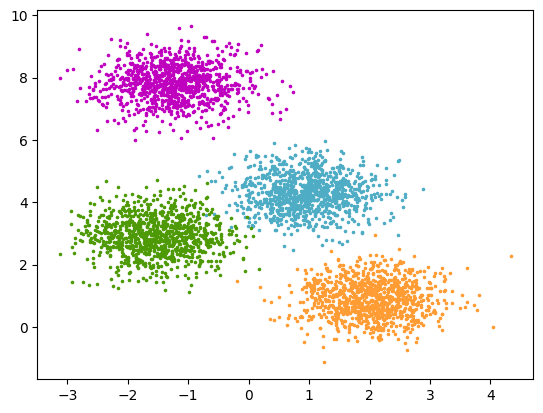

In [95]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
print(X)
print(y_true)
print(type(y_true))

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    print(k,col)
    cluster_data = y_true == k
    print(cluster_data)
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)




new_centroid objext is: <class 'numpy.ndarray'>
we are at centroid: 0 [-1.03570852  8.134628  ]
we are at centroid: 1 [-0.90477687  8.93339595]
we are at centroid: 2 [1.95004771 1.63061354]
we are at centroid: 3 [1.30034389 5.67806757]
[[-1.26400784  7.70932371]
 [-1.10492089  8.83857751]
 [ 0.66023861  1.67414476]
 [ 0.23417204  4.18719197]]
<class 'numpy.ndarray'>
new_centroid objext is: <class 'numpy.ndarray'>
we are at centroid: 0 [-1.26400784  7.70932371]
we are at centroid: 1 [-1.10492089  8.83857751]
we are at centroid: 2 [0.66023861 1.67414476]
we are at centroid: 3 [0.23417204 4.18719197]
[[-1.2759446   7.59803793]
 [-1.10512786  8.5768516 ]
 [ 1.25855502  1.21560241]
 [-0.11245569  3.8483684 ]]
<class 'numpy.ndarray'>
new_centroid objext is: <class 'numpy.ndarray'>
we are at centroid: 0 [-1.2759446   7.59803793]
we are at centroid: 1 [-1.10512786  8.5768516 ]
we are at centroid: 2 [1.25855502 1.21560241]
we are at centroid: 3 [-0.11245569  3.8483684 ]
[[-1.29073285  7.5244883

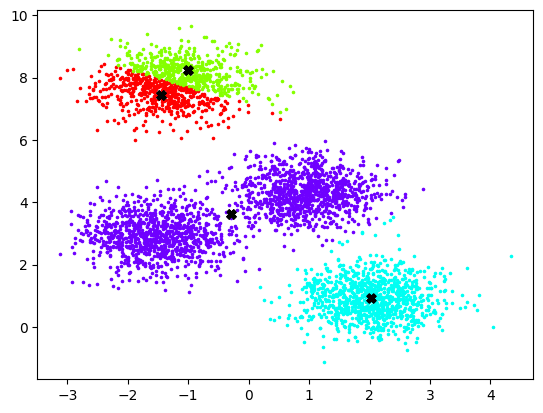

In [240]:

import numpy as np

# function to get initial cluster centroids; we randomly choose k points from the dataset 
def get_initial_clusters(k, X):
  random_indices = np.random.randint(0, X.shape[0], k)
  # print(X.shape)
  # print(X.shape[0])
  # print(random_indices)
  initial_centroids = X[random_indices]

  return initial_centroids

# use X data set from above, and choose k random points (x1,x2)
k_total = 4
init_centers = get_initial_clusters(k_total,X)
#print(init_centers)
#print(type(init_centers))
# print(init_centers[0])
# print(init_centers[:,0])
kmeans(X, init_centers, 10)


#get_distance(X[0],init_centers)

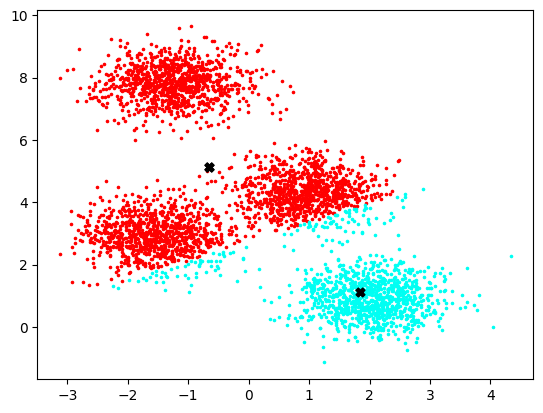

In [244]:
#we have coded the K-means algorithm above here we will test the cases for k = {2, 3, 4, 6, 10}

k_total = 2 # 2 clusters
iters = 10  # we will keep 10 loops of the algorithm

init_centers = get_initial_clusters(k_total,X)

kmeans(data=X, centroids=init_centers, max_iterations=iters)

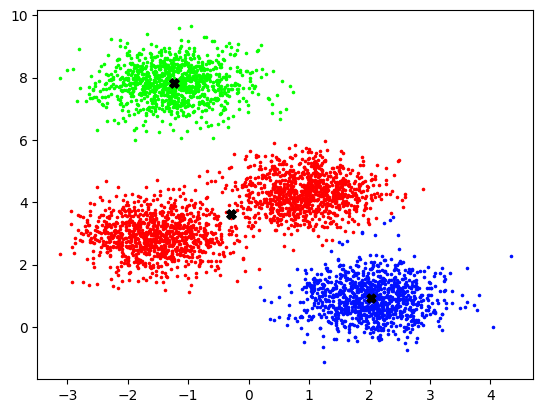

In [245]:
#we have coded the K-means algorithm above here we will test the cases for k = {2, 3, 4, 6, 10}

k_total = 3 # 2 clusters
iters = 10  # we will keep 10 loops of the algorithm

init_centers = get_initial_clusters(k_total,X)

kmeans(data=X, centroids=init_centers, max_iterations=iters)

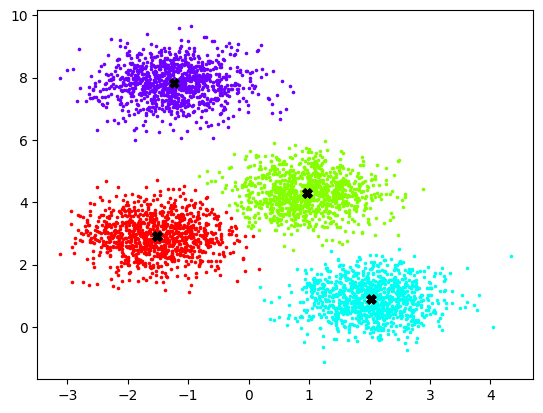

In [246]:
#we have coded the K-means algorithm above here we will test the cases for k = {2, 3, 4, 6, 10}

k_total = 4 # 2 clusters
iters = 10  # we will keep 10 loops of the algorithm

init_centers = get_initial_clusters(k_total,X)

kmeans(data=X, centroids=init_centers, max_iterations=iters)

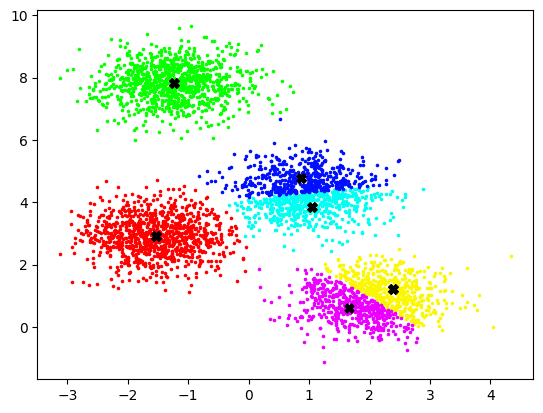

In [247]:
#we have coded the K-means algorithm above here we will test the cases for k = {2, 3, 4, 6, 10}

k_total = 6 # 2 clusters
iters = 10  # we will keep 10 loops of the algorithm

init_centers = get_initial_clusters(k_total,X)

kmeans(data=X, centroids=init_centers, max_iterations=iters)

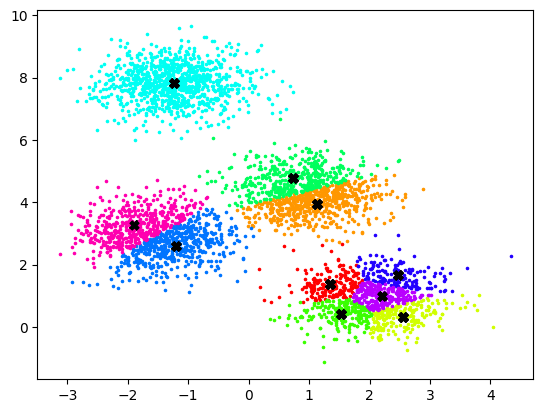

In [248]:
#we have coded the K-means algorithm above here we will test the cases for k = {2, 3, 4, 6, 10}

k_total = 10 # 2 clusters
iters = 10  # we will keep 10 loops of the algorithm

init_centers = get_initial_clusters(k_total,X)

kmeans(data=X, centroids=init_centers, max_iterations=iters)

# Question 3. (Kernel Methods with Noisy Setting, 60 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package ( scikit-learn svm.SVC class) to learn SVMs with a variety of parameter settings. 

[0 0 1 0 1]
[[-0.04855297 -0.42001794]
 [ 2.76405235  1.40015721]
 [-2.48738648  2.64973314]
 [ 3.11679102 -0.6108784 ]
 [-3.19262076 -5.92510969]]
0 #4EACC5
1 #FF9C34


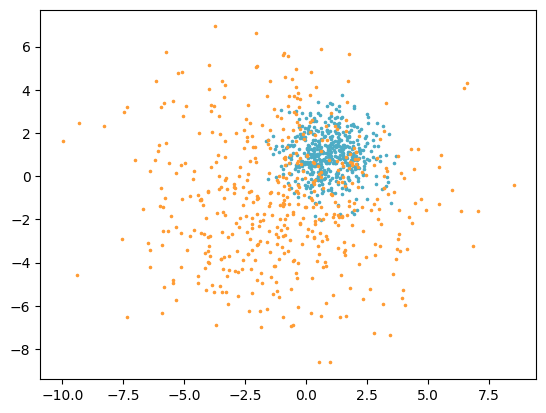

In [299]:
#create training data set
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 1000
#n_components = 1
features = 2

X_train, Y_train = make_blobs(
    n_samples=n_samples, n_features=features, centers=[[1,1],[-1,-1]], cluster_std=[1,3], random_state=0)

print(Y_train[0:5])
print(X_train[0:5])

# print(X)
# print(y_true)
# print(type(y_true))

colors = ["#4EACC5", "#FF9C34"] #here 0 = blue => +1 & 1 = orange => -1

for k, col in enumerate(colors):
    print(k,col)
    cluster_data = Y_train == k
    #print(cluster_data)
    plt.scatter(X_train[cluster_data, 0], X_train[cluster_data, 1], c=col, marker=".", s=10)


0 #4EACC5
1 #FF9C34


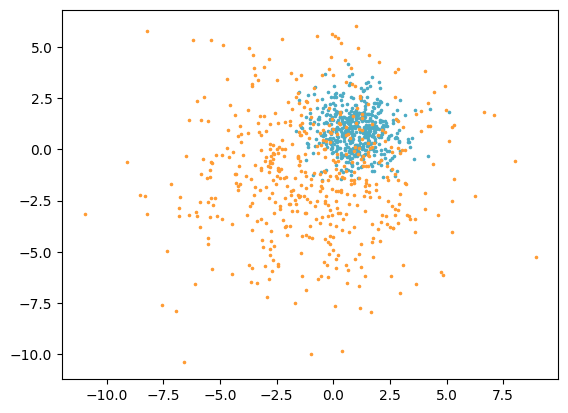

In [300]:
#test data set
x_test, y_test = make_blobs(
    n_samples=n_samples, n_features=features, centers=[[1,1],[-1,-1]], cluster_std=[1,3], random_state=2)


colors = ["#4EACC5", "#FF9C34"]

for k, col in enumerate(colors):
    print(k,col)
    cluster_data = y_test == k
    #print(cluster_data)
    plt.scatter(x_test[cluster_data, 0], x_test[cluster_data, 1], c=col, marker=".", s=10)

## (a -- 20 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



0 #4EACC5
1 #FF9C34


SVC(C=1, gamma=0.01)

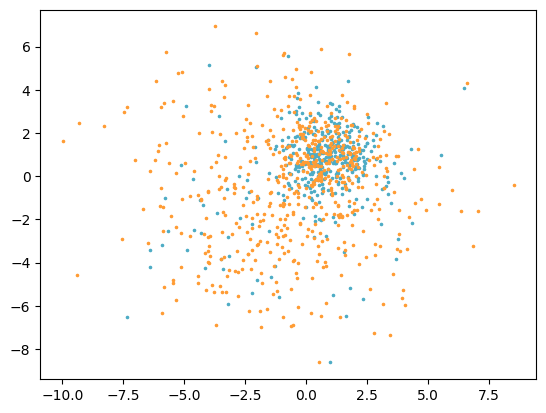

In [346]:
# Your code here
from sklearn.svm import SVC
import random


# Inject noisy labels to clean train labels
# y_train_noisy = Y_train

def scramble(data,noise1,noise2):
    data_noisy = data.copy()
    #print(type(data))
    for i in range(len(data)):
        if data[i] == 0:
            tmp_prob = random.uniform(0, 1) # noise % of the points will be flipped 1<-->0
            if tmp_prob < noise1: 
                data_noisy[i] = 1 - data[i]
        elif data[i] == 1:
            tmp_prob = random.uniform(0, 1) # noise % of the points will be flipped 1<-->0
            if tmp_prob < noise2: 
                data_noisy[i] = 1 - data[i]
    return data_noisy

Y_train_noisy = scramble(Y_train,0.35,0.20)


colors = ["#4EACC5", "#FF9C34"] #here 0 = blue => +1 & 1 = orange => -1

for k, col in enumerate(colors):
    print(k,col)
    cluster_data = Y_train_noisy == k
    #print(cluster_data)
    plt.scatter(X_train[cluster_data, 0], X_train[cluster_data, 1], c=col, marker=".", s=10)


#train the model with this new noisy data, and given paramters
model = SVC(C=1,kernel='rbf',gamma=0.01)
model.fit(X_train, Y_train_noisy)

In [349]:
#print average accuracy over 20 iterations
#train the model with this new noisy data, and given paramters
total_score = 0
model = SVC(C=1,kernel='rbf',gamma=0.01)

for i in range(20):
    Y_train_noisy = scramble(Y_train,0.35,0.20) #make new set of noisy data

    model.fit(X_train, Y_train_noisy) #train it
    total_score += model.score(x_test,y_test) #get score

print("Average accuracy is:",total_score/20)



Average accuracy is: 0.7981999999999999


## (b -- 20 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?


In [351]:
# how do we correct wrong labels from the noisy data set.....? 

from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=5) #use 5 nearest neighbors
neigh.fit(X_train, Y_train_noisy) #train the model

neigh.predict(X_train) #predict correct labels for training data?






KNeighborsClassifier()


## (c -- 20 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?

In [354]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
y_pred_kmeans = kmeans.labels_

#print(y_pred_kmeans)

#now train the SVC model with these new labesl
model = SVC(C=1,kernel='rbf',gamma=0.01)
model.fit(X_train, y_pred_kmeans) #train it

print(model.score(x_test,y_test))

0.249
